In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import neuralNets as NN
from sklearn.datasets import make_moons

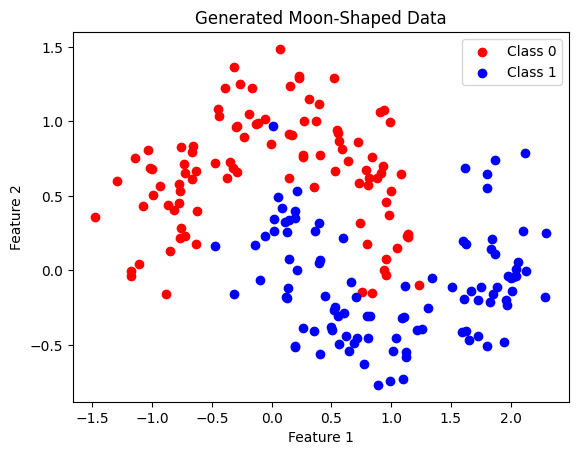

In [2]:
# Generate moon-shaped data
num_points = 200
X, y = make_moons(n_samples=num_points, noise=0.2, random_state=42)

# Visualize the generated data
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Moon-Shaped Data')
plt.show()

In [3]:
perceptron = NN.Perceptron(2, NN.Activation().sigmoid())
alpha = 0.001
perceptron.train(alpha, X, y, epochs=1000)

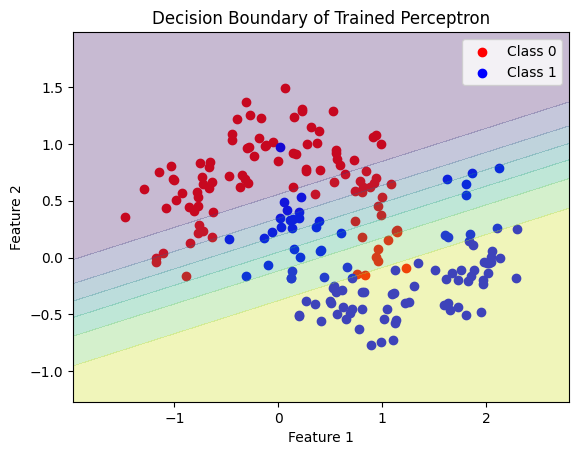

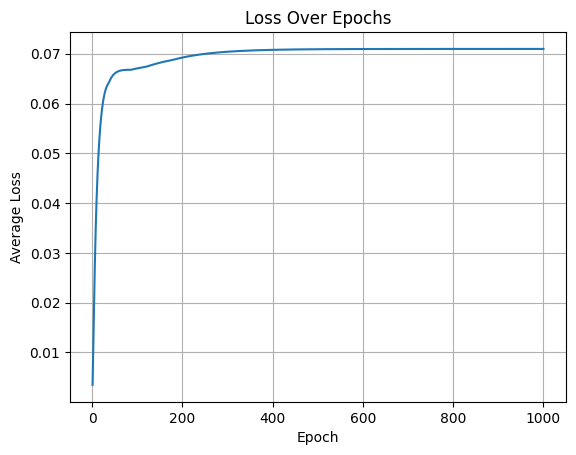

In [4]:
# Visualize the decision boundary
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# Define a meshgrid for visualization
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict the labels for the meshgrid points
Z = np.array([perceptron.output(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary of Trained Perceptron')
plt.show()


# Loss 
plt.plot(range(1, len(perceptron.losses) + 1), perceptron.losses)
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.title('Loss Over Epochs')
plt.grid(True)
plt.show()